In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.lines import Line2D
from scipy.stats import beta as beta_dist
import pandas as pd
from tabulate import tabulate
import warnings
import seaborn as sns
import os.path as osp
import os

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
import matplotlib
matplotlib.style.use('classic')

In [4]:
%load_ext autoreload
%autoreload 2
from rankingFairness.src.experimentMultipleGroups import simpleOfflineMultipleGroups
from rankingFairness.src.utils import set_seed, plotDrichletDist
from rankingFairness.src.rankingsMultipleGroups import PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker
from rankingFairness.src.distributions import Bernoulli, BetaBernoulli, Multinomial, DrichletMultinomial, Drichlet

In [5]:
SEED=42
set_seed(SEED)

In [6]:
def plot_relevance_probs(probs_a, probs_b, loc='lower right', extra=False, saveFig=None):
    fig, ax =plt.subplots(figsize=(5,5))
    if extra:
        ax.scatter(np.arange(1,len(probs_a)+1), probs_a, s=80, c='teal', alpha=0.8, label='Majority Group')
        ax.scatter(np.arange(1, len(probs_b)+1), probs_b, s=80, c='lightpink', alpha=0.8, label='Minority Group')
    else:
        ax.scatter(np.arange(1,len(probs_a)+1), probs_a, s=80, c='teal',alpha=0.8)
        ax.scatter(np.arange(1, len(probs_b)+1), probs_b, s=80, c='lightpink', alpha=0.8)
    relevance_handle = ax.plot([], [], ' ', label=r'$\bf{n_A=}$'+f"{sum(probs_a):.2f},"+ r'$\bf{n_B=}$'+f"{sum(probs_b):.2f}")
    size_handle = ax.plot([], [], ' ', label=r'$\bf{\vert A \vert=}$' + f"{len(probs_a)}," +r'$\bf{\vert B \vert=}$'+ f"{len(probs_b)}")
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles=handles, fontsize=15)

    ax.set_xlabel('Candidates', fontsize=15)
    ax.set_xticks([])
    ax.set_ylabel(r'$\mathbb{P}(r_i|\mathcal{D})$', fontsize=20)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)
    ax.legend( loc=loc,markerscale=1., scatterpoints=1, fontsize=15, fancybox=True, framealpha=0.5)
    plt.grid()
    plt.tight_layout()
    if saveFig is not None:
        plt.savefig(f"{osp.join('/share/thorsten/rr568/CostOptimal_FairRankings/plots/relevances',str(saveFig))}")
    plt.show()
    plt.close()

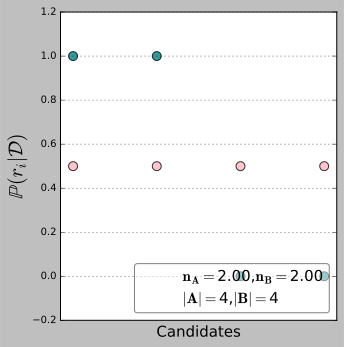

In [7]:
A_true=[1,1,0,0]
B_true=[0.5]*4
plot_relevance_probs(A_true, B_true)

Finished 'rank' in 0.0003 secs


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 48092.65it/s]


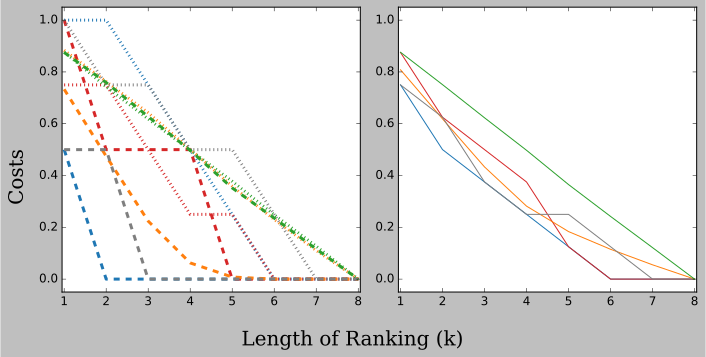

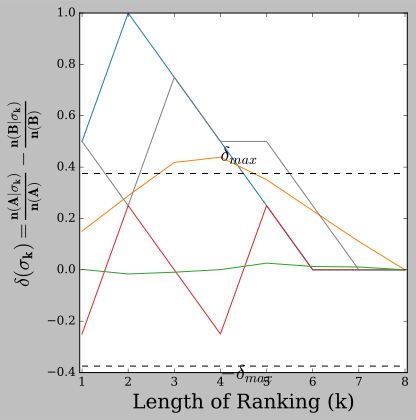

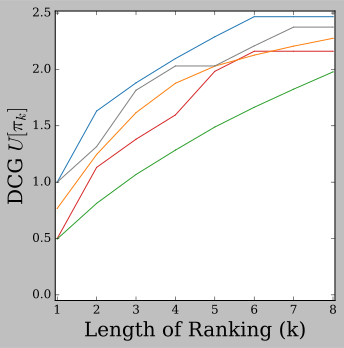

In [9]:

A_true=[1.0,1.0,0,0]
B_true=[0.5]*4

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]

exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=len(A_true)+len(B_true),
                    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli, switch_start=False)
exp.experiment(rankingAlgos=[PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker], simulations=1000)

Finished 'rank' in 0.0004 secs


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 47880.18it/s]


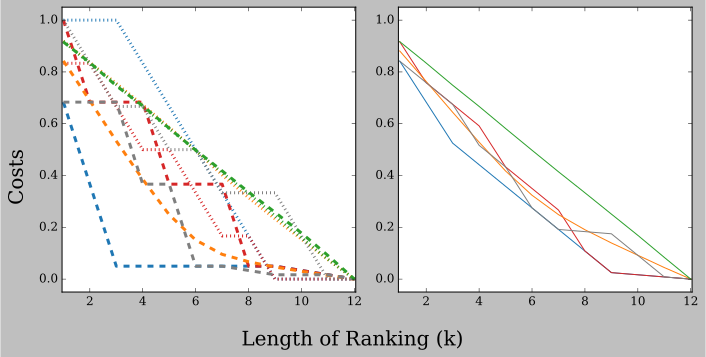

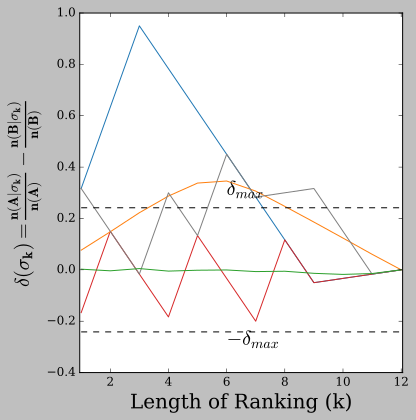

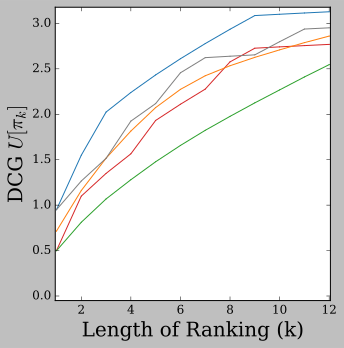

In [15]:
A_true=[0.95,0.95,0.95,0.05,0.05,0.05]
B_true=[0.5]*6

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]

exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=len(A_true)+len(B_true), 
                    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli, switch_start=False)
exp.experiment(rankingAlgos=[PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker], simulations=1000)

Finished 'rank' in 0.0017 secs


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 46320.82it/s]


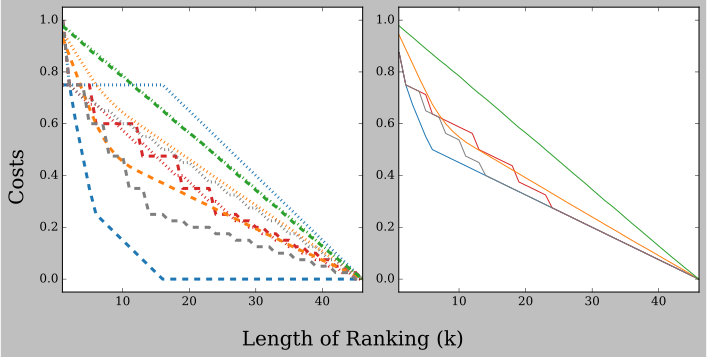

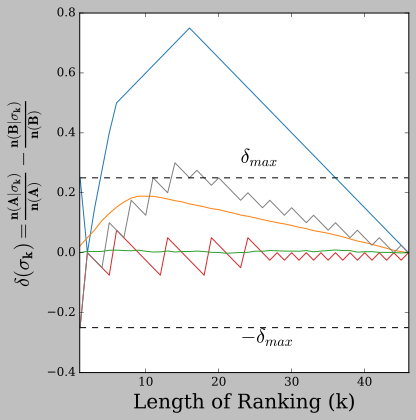

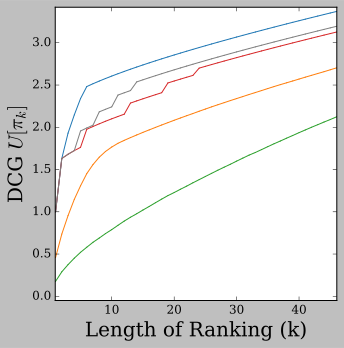

In [21]:
A_true = [1, 0.6, 0.5, 0.5, 0.4, 0.1, 0.1, 0.1,0.1,0.1, 0.1,0.1,0.1,0.1,0.1]
B_true = [1]+[0.1]*30

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]

exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=len(A_true)+len(B_true), 
      predfined_ls=[A_dist, B_dist], distType=BetaBernoulli, switch_start=False)
exp.experiment(rankingAlgos=[PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker], simulations=1000)

In [24]:
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
colorMap={'PRP':'tab:blue', 
            'TS':'tab:orange', 
            'DP':'tab:grey',
            'Uniform':'tab:green', 
            'EOR':'tab:red',
            'others':'tab:olive',
            'RR':'tab:brown',
            'DC':'tab:pink'}
offset=0.05

Finished 'rank' in 0.0017 secs


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 46663.52it/s]


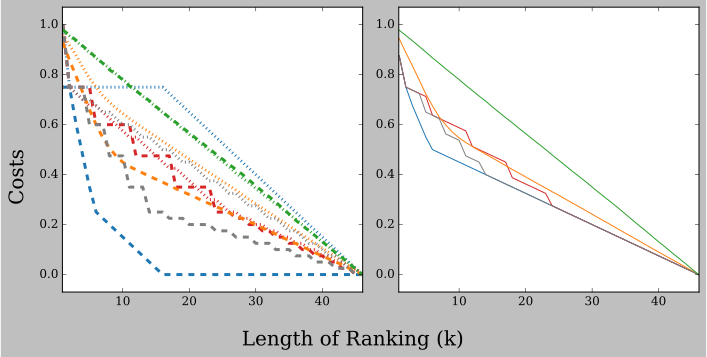

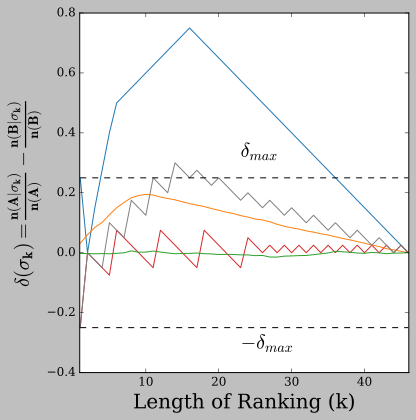

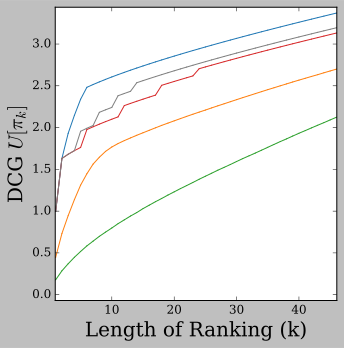

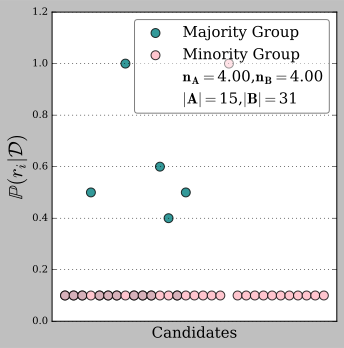

In [25]:
A_true = [1, 0.6, 0.5, 0.5, 0.4, 0.1, 0.1, 0.1,0.1,0.1, 0.1,0.1,0.1,0.1,0.1]
B_true = [1]+[0.1]*30
np.random.shuffle(A_true)
np.random.shuffle(B_true)

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]
exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=len(A_true)+len(B_true), 
    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli, saveFig=osp.join(save_path, 'handpicked'),
                    offset=0.07, switch_start=False)
exp.experiment(rankingAlgos=[PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker], simulations=1000)
plot_relevance_probs(A_true, B_true, loc='upper right', extra=True, saveFig='handpicked_rel.pdf')

Finished 'rank' in 0.0094 secs


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 34603.33it/s]


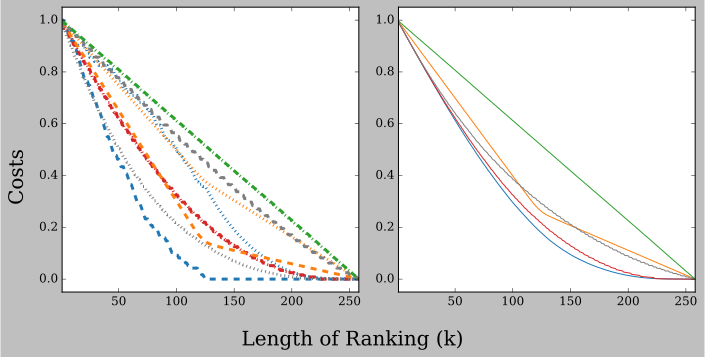

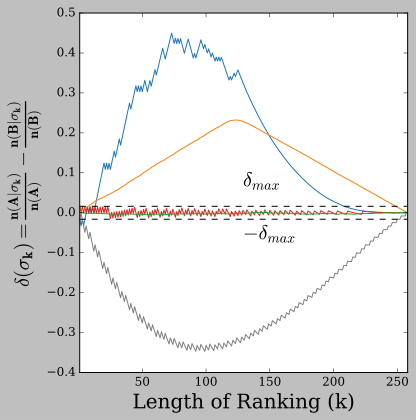

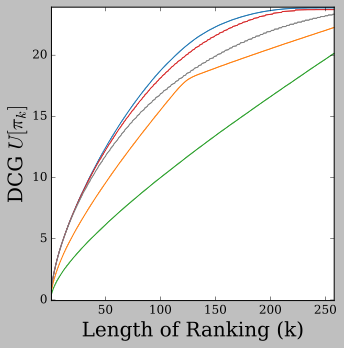

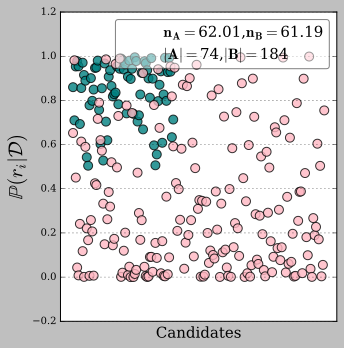

In [26]:
# size_A = np.random.choice(np.arange(30,100), 1)
rankingAlgos=[PRP_Ranker, Uniform_Ranker, TS_RankerII, DP_Ranker, EO_RankerII]

size_A=74
A_true = np.random.power(5,size=size_A)
n_A=sum(A_true)
B_true=[]
n_B=0
rel_diff=1
while abs(n_A-n_B)>=rel_diff:
    B_true.append(np.random.power(0.5,size=1).item())
    n_B=sum(B_true)

num_groups=2
A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]
rankingAlgos=[PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker]
exp = simpleOfflineMultipleGroups(num_groups=num_groups, num_docs=len(A_true)+len(B_true), 
  predfined_ls=[A_dist, B_dist], distType=BetaBernoulli, saveFig=osp.join(save_path, f'powerlaw_same_rel'),
                offset=0.05, switch_start=False, verbose=True)
exp.experiment(rankingAlgos=rankingAlgos, simulations=1000)
plot_relevance_probs(A_true, B_true, loc='upper right', saveFig=osp.join(save_path, f'powerlaw_same_rel.pdf'))

In [27]:
cost_groups=exp.cost_groups
total_cost=exp.total_cost
EO_constraint=exp.EO_constraint
delta_max=exp.delta_max

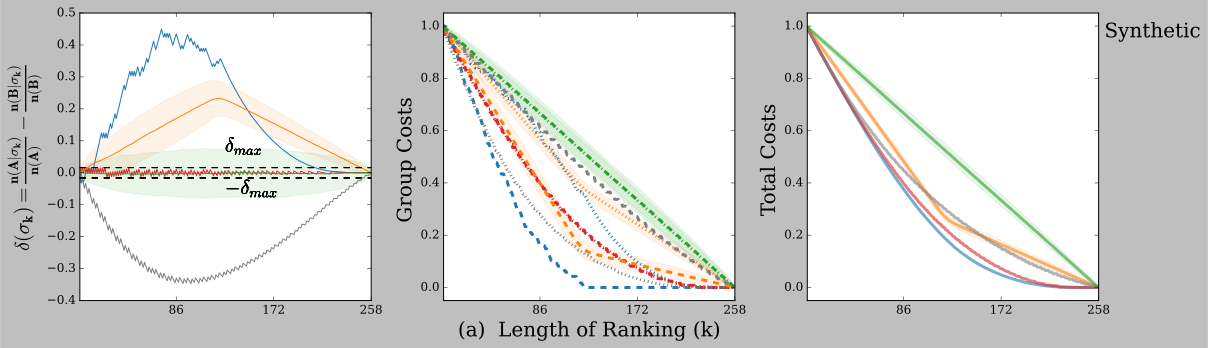

In [32]:
num_docs=total_cost.shape[-1]
fig, ax = plt.subplots(figsize=(17,5), ncols=3)
plt.rc('font', family='serif')
for a, rankingAlg in enumerate(rankingAlgos):
    ax[1].plot(np.arange(num_docs)+1, cost_groups[a,0,:], linestyle='dashed', c=colorMap[rankingAlg.name()], linewidth=3)
    ax[1].plot(np.arange(num_docs)+1, cost_groups[a,1,:],  linestyle='dotted', c=colorMap[rankingAlg.name()], linewidth=3)
    ax[2].plot(np.arange(num_docs)+1, total_cost[a,:], linestyle='solid', c=colorMap[rankingAlg.name()], linewidth=3, alpha=0.6)
    if rankingAlg.name() in ['TS', 'Uniform']:
        ax[0].fill_between(np.arange(num_docs)+1, EO_constraint[a,:]+exp.EOR_std[a,:],
                           EO_constraint[a,:]-exp.EOR_std[a,:], alpha=0.1, color=colorMap[rankingAlg.name()])
        ax[2].fill_between(np.arange(num_docs)+1, total_cost[a,:]+exp.total_cost_std[a,:], 
                           total_cost[a,:]-exp.total_cost_std[a,:], alpha=0.1, color=colorMap[rankingAlg.name()])
        ax[1].fill_between(np.arange(num_docs)+1, cost_groups[a,0,:]+exp.group_cost_std[a,0,:],
                           cost_groups[a,0,:]-exp.group_cost_std[a,0,:], alpha=0.1, color=colorMap[rankingAlg.name()])
        ax[1].fill_between(np.arange(num_docs)+1, cost_groups[a,1,:]+exp.group_cost_std[a,1,:],
                           cost_groups[a,1,:]-exp.group_cost_std[a,1,:], alpha=0.1, color=colorMap[rankingAlg.name()])
    ax[0].plot(np.arange(num_docs)+1, EO_constraint[a,...], label=str(rankingAlg.name()), c=colorMap[rankingAlg.name()])
#     ax[0].axhline(y=0, xmin=0, xmax=num_docs, color='black', linestyle='dashed')
    ax[0].axhline(y=delta_max, xmin=0, xmax=num_docs, color='black', linestyle='dashed')
    ax[0].axhline(y=-delta_max, xmin=0, xmax=num_docs, color='black', linestyle='dashed')
    ax[0].text(num_docs/2, np.max(delta_max)+offset, r'$\delta_{max}$', c='black', fontsize=20)
    ax[0].text(num_docs/2, -np.max(delta_max)-offset, r'$-\delta_{max}$', c='black', fontsize=20)    
    
if num_groups==2:
    ax[0].set_ylabel(r'$\bf{\delta(\sigma_k) = \frac{n(A|\sigma_k) }{n(A)}- \frac{n(B|\sigma_k)}{n(B)}}$', fontsize=20)
else:
    ax[0].set_ylabel(r'$\bf{\delta(\sigma_k) = \max_{g} \left(\frac{n(g|\sigma_k) }{n(g)}\right)- \min_{g} \left(\frac{n(g|\sigma_k)}{n(g)}\right)}$', fontsize=20)
    ax[0].set_ylim(-offset, np.max(EO_constraint)+offset)
ax[0].set_xlim(1-offset, num_docs+offset)


ax[0].xaxis.set_major_locator(mticker.MultipleLocator(int(num_docs/3)))
ax[1].xaxis.set_major_locator(mticker.MultipleLocator(int(num_docs/3)))
ax[2].xaxis.set_major_locator(mticker.MultipleLocator(int(num_docs/3)))
ax[1].set_xlabel("(a)  Length of Ranking (k)", fontsize=20)
ax[1].set_ylabel(f"Group Costs ", fontsize=20)
ax[2].set_ylabel(f"Total Costs ", fontsize=20)
ax[2].text(1.02,0.9,'Synthetic', fontsize=20, ha='left', va='bottom', transform=ax[2].transAxes)
ax[1].set_ylim(-offset, 1 + offset)
ax[1].set_xlim(1-offset, num_docs+offset)
ax[2].set_ylim(-offset, 1 + offset)
ax[2].set_xlim(1-offset, num_docs+offset)
plt.tight_layout()
plt.savefig(osp.join(save_path, 'powerlaw_same_rel', "all_three_plots.pdf"))
plt.show() 
plt.close()

In [ ]:

A_true = [1, 0.6, 0.5, 0.5, 0.4, 0.1, 0.1, 0.1,0.1,0.1, 0.1,0.1,0.1,0.1,0.1]
B_true = [1]+[0.1]*30
C_true = [0.5]*8
A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]
C_dist = [Bernoulli(p) for p in C_true]

merits_A = np.array([d.sample(1) for d in A_dist])[None,:]
merits_B = np.array([d.sample(1) for d in B_dist])[None,:]
merits_C = np.array([d.sample(1) for d in C_dist])[None,:]
merits = np.hstack((merits_A, merits_B, merits_C)).squeeze(-1)
print(merits)
assert merits.shape[0]==1
assert merits.shape[1]==len(A_dist)+len(B_dist)+len(C_dist)


exp = simpleOfflineMultipleGroups(num_groups=3, num_docs=len(A_true)+len(B_true)+len(C_true), merits=merits,
                    predfined_ls=[A_dist, B_dist, C_dist], distType=BetaBernoulli, switch_start=False)
exp.experiment(rankingAlgos=[DP_Ranker, EO_RankerII], simulations=1000)

# PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker

Finished 'rank' in 0.0036 secs


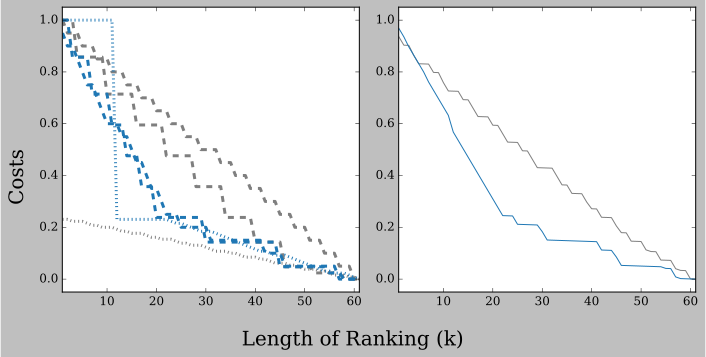

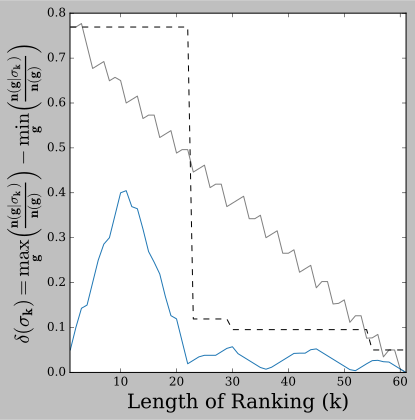

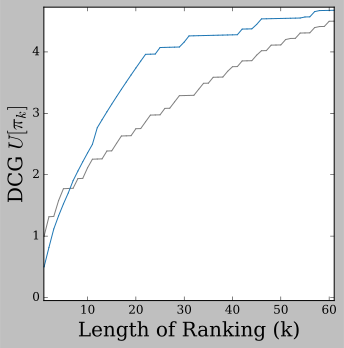

In [22]:

A_true = [0.6, 0.5, 0.5, 0.4,0.1]*2
B_true = [1]+[0.01]*30
C_true = [0.5]*20

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]
C_dist = [Bernoulli(p) for p in C_true]


exp = simpleOfflineMultipleGroups(num_groups=3, num_docs=len(A_true)+len(B_true)+len(C_true),
                    predfined_ls=[A_dist, B_dist, C_dist], distType=BetaBernoulli, switch_start=False)
exp.experiment(rankingAlgos=[DP_Ranker, EO_RankerII], simulations=1000)

# PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker

In [ ]:
size=10
thetas = np.random.power(0.5, size=size)
g_groups=[]
g_groups_dist=[]
for g in np.arange(size):
    g_groups.append([thetas[g]])
    g_groups_dist.append([Bernoulli(p) for p in g_groups[-1]])

exp = simpleOfflineMultipleGroups(num_groups=size, num_docs=size, 
                    predfined_ls=g_groups_dist, distType=BetaBernoulli, switch_start=False)
exp.experiment(rankingAlgos=[PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker], simulations=1000)